In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import mnist

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [14]:
cls = GaussianNB()
fit_nb = cls.fit(x_train, y_train)

In [15]:
predictions = fit_nb.predict(x_test)
matrix = confusion_matrix(y_test, predictions)
print(matrix)

[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]]


In [16]:
def diagonal_sum(matrix):
  sum = 0
  for i in range(10):
    for j in range(10):
      if i==j: sum+= matrix[i,j]
  return sum
sum2 = diagonal_sum(matrix)
print(f'Accuracy: {sum2/10000}')

Accuracy: 0.5558


Text(69.0, 0.5, 'Predicted value')

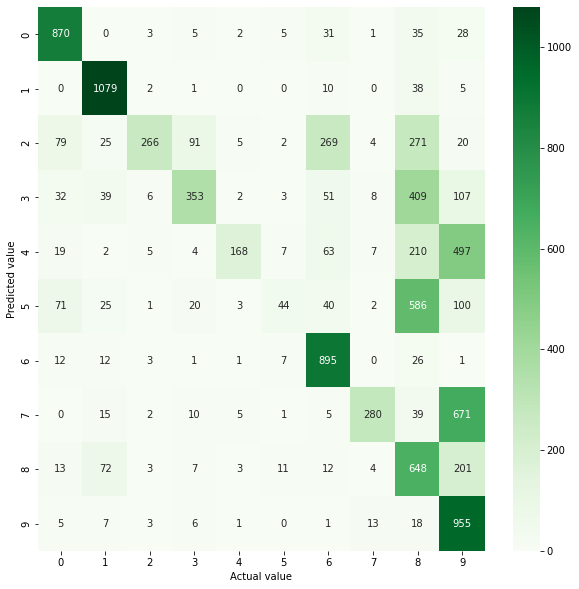

In [17]:

plt.figure(figsize=(10,10))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Actual value')
plt.ylabel('Predicted value')


In [18]:
predictions = cls.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000

